[array([ 6.5, 10.8]), array([16.6,  6.7]), array([16.6, 16.7])]


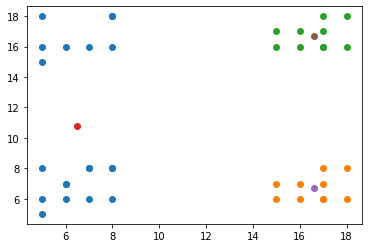

Silhouette : 0.7174663301885214


In [62]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

import matplotlib.pyplot as plt
spark = SparkSession.Builder().appName('SparkML Clustering').getOrCreate()
pointsDF = spark.read.option('inferSchema','true')\
                        .option('header','false')\
                        .option('delimiter',',').csv('datasets/points.txt')
pointsDF = pointsDF.withColumnRenamed('_c0','x')
pointsDF = pointsDF.withColumnRenamed('_c1','y')
vec = VectorAssembler(inputCols=['x','y'],outputCol='features')
pointsDF = vec.transform(pointsDF)
k = 4
km = KMeans().setK(k)
model = km.fit(pointsDF)
print(model.clusterCenters())
pointsDF = model.transform(pointsDF) #Her noktayı bulmuş olduğumuz cluster center a atamasını yapıyoruz
for a in range(k):
    x = pointsDF.filter(pointsDF['prediction']==a).select('x').rdd.flatMap(lambda x : list(x)).collect()
    y = pointsDF.filter(pointsDF['prediction']==a).select('y').rdd.flatMap(lambda x : list(x)).collect()
    plt.scatter(x,y)
#x = pointsDF.toPandas()['x']
#y = pointsDF.toPandas()['y']
centers = model.clusterCenters()
for x in range(k):
    plt.scatter(centers[x][0],centers[x][1])
plt.show()
#silhouette değer bize noktaların yerinden memnun olup olmadıklarını söyler!!
eva = ClusteringEvaluator()
silhouetteValue = eva.evaluate(pointsDF)
print("Silhouette :",silhouetteValue)